In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [21]:
file_path = 'email-Eu-core.txt'

edges = []
with open(file_path, 'r') as f:
    for line in f:
        if line.startswith("#"):
            continue
        src, dst = map(int, line.strip().split())
        edges.append((src, dst))
        
edges_subset = edges[:1300]

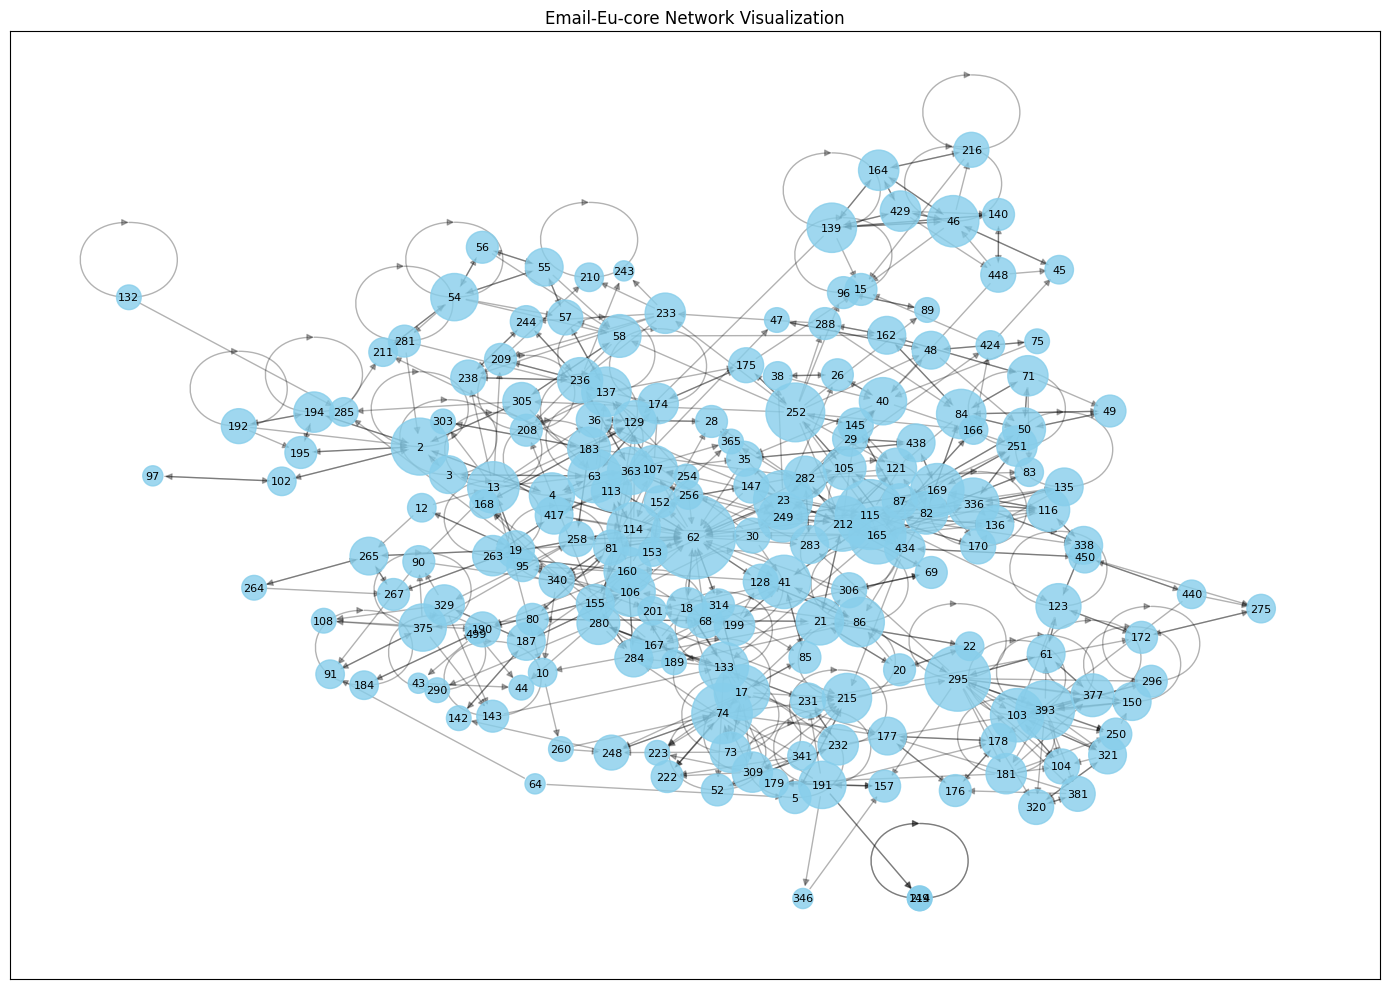

In [25]:
G_subset = nx.DiGraph()
G_subset.add_edges_from(edges_subset)

nodes_filtered_subset = [node for node in G_subset.nodes() if G_subset.degree(node) >= 5]
G_subset_filtered = G_subset.subgraph(nodes_filtered_subset).copy()

degree_centrality_subset = nx.degree_centrality(G_subset_filtered)

plt.figure(figsize=(14, 10))
# pos_subset = nx.spring_layout(G_subset_filtered, seed=42, k=0.15, iterations=50)
pos_subset = nx.kamada_kawai_layout(G_subset_filtered, scale=2.0)

node_sizes_subset = [20000 * degree_centrality_subset[n] for n in G_subset_filtered.nodes()]
edge_widths_subset = [1 for _ in G_subset_filtered.edges()]

nx.draw_networkx_nodes(G_subset_filtered, pos_subset, node_size=node_sizes_subset, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(G_subset_filtered, pos_subset, width=edge_widths_subset, alpha=0.3)
nx.draw_networkx_labels(G_subset_filtered, pos_subset, font_size=8)

plt.title("Email-Eu-core Network Visualization")
plt.axis('on')
plt.tight_layout()

plt.savefig('output.png', format='png', dpi=300)
plt.show()
